## CO2 EMMISSIONS PREDICTION MODEL

In this project, we'll dive into a dataset about fuel consumption and the CO2 emissions of vehicles. Specifically, we seek to develop a linear regression model that predicts the CO2 emissions of a vehicle based on its characteristics. By understanding this relationship, we can identify key factors that influence the emissions.

Let's load the dataset and take a look at the first few rows to understand its structure and content. 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
data = pd.read_csv('FuelConsumptionCo2.csv')

# show first five rows
data.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### DATA CLEANING
Before diving into any data analysis or modeling, it's essential to ensure that the data is clean and free of any errors, inconsistencies, or missing values. This is because the quality of the input data directly influences the quality of the output or predictions from any model. Let's begin by checking for any missing values in our dataset.

In [3]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

#### Distributions of CO2 Emissions:
To examine the distributions of CO2 Emissions in the dataset, we will create histogram. It is an estimate of the probability distribution of a continuous variable.

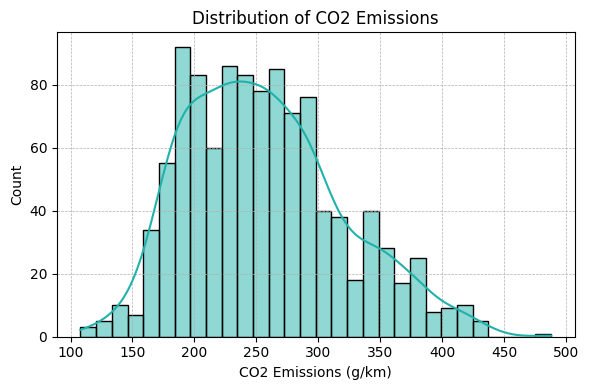

In [10]:
# Plot Distribution of CO2 Emissions

plt.figure(figsize=(6, 4))
sns.histplot(data['CO2EMISSIONS'], kde=True, bins=30, color='lightseagreen')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.tight_layout()
plt.show()

The histogram presents the distribution of CO2 emissions across all vehicles in the dataset. We observe that the majority of vehicles have CO2 emissions in the range of approximately 170-300 g/km.

#### Relationships Between Key Variables and CO2 Emissions:
We will focus on a few numerical features that might have a strong relationship with CO2 emissions. These features are 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'. Let’s create scatter plots for each of the specified features against CO2EMISSIONS.


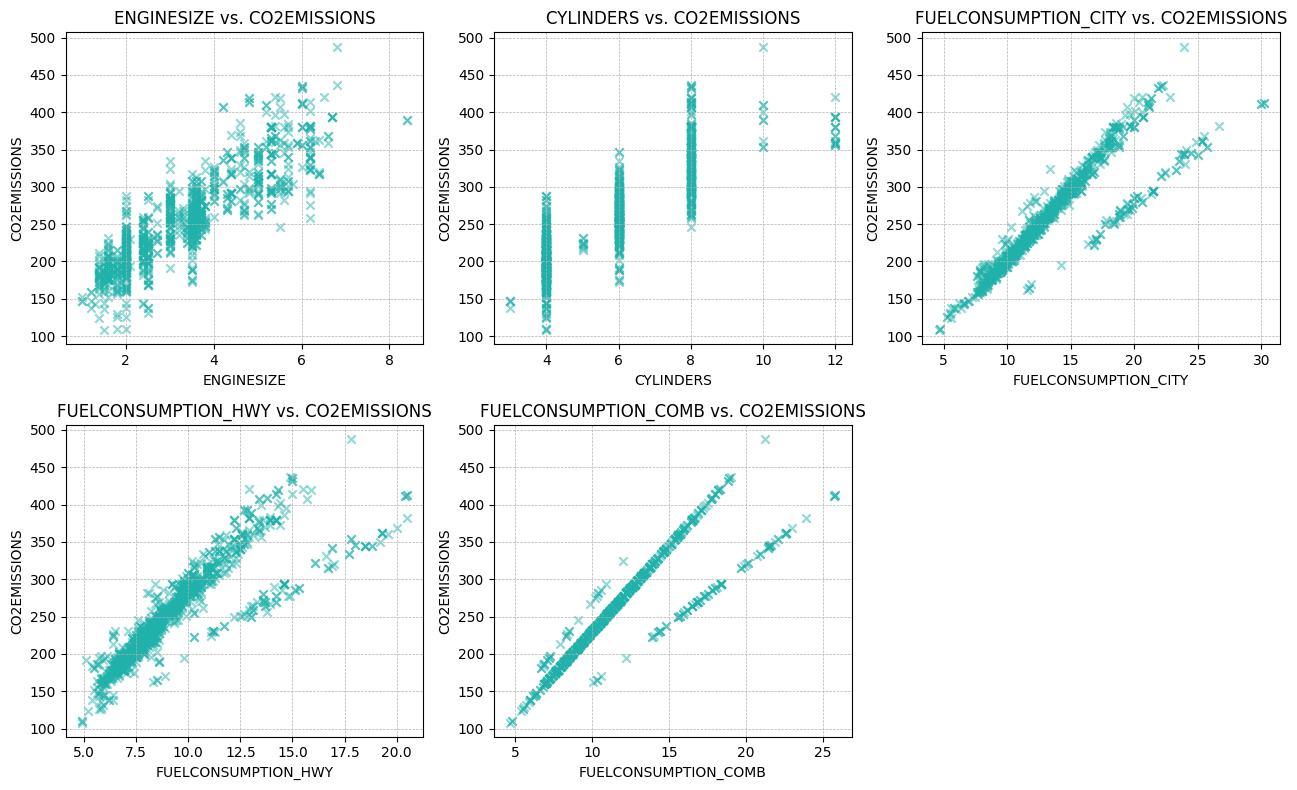

In [11]:
# List of features to explore
features = [
    'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
    'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']

# Plot scatter plots for each feature against CO2EMISSIONS
plt.figure(figsize=(13, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(data[feature], data['CO2EMISSIONS'], 
                alpha=0.5, color='lightseagreen', marker='x')
    plt.title(f'{feature} vs. CO2EMISSIONS')
    plt.xlabel(feature)
    plt.ylabel('CO2EMISSIONS')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

These scatter plots provide a visual representation of how various vehicle features relate to CO2 emissions:
* Engine Size vs. CO2 Emissions: There seems to be a positive correlation between engine size and CO2 emissions. As the engine size increases, CO2 emissions also tend to increase. This relationship is expected, as larger engines often consume more fuel, leading to higher emissions.
* Cylinders vs. CO2 Emissions: While there is some variability, a general trend indicates that vehicles with a higher number of cylinders tend to have higher CO2 emissions. This is consistent with the fact that vehicles with more cylinders often have larger engines and, therefore, might consume more fuel.
* Fuel Consumption (City) vs. CO2 Emissions: City fuel consumption presents a clear positive relationship with CO2 emissions.
* Fuel Consumption (Highway) vs. CO2 Emissions: Similarly, highway fuel consumption also shows a positive correlation with CO2 emissions.
* Combined Fuel Consumption vs. CO2 Emissions: As expected, there's a positive relationship between combined fuel consumption and CO2 emissions. Vehicles that consume more fuel (higher L/100km) tend to emit more CO2


#### LINEAR REGRESSION MODEL

Linear regression is a statistical method used to model and analyze the relationships between a dependent variable and one or more independent variables. In our context, we want to predict the CO2 emissions (dependent variable) based on various vehicle features (independent variables). The main goal of linear regression is to find the best fit straight line that accurately predict the output values within a range.

Linear regression is a statistical method used to model and analyze the relationships between a dependent variable and one or more independent variables. In our context, we want to predict the CO2 emissions (dependent variable) based on various vehicle features (independent variables). The main goal of linear regression is to find the best fit straight line that accurately predict the output values within a range.

In [15]:
# Redefining the list of selected features and target variable
selected_features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']
X_selected = data[selected_features]
y = data['CO2EMISSIONS']

Spliting Dataset: We'll divide our dataset into training and testing sets. The training set will be used to train our linear regression model, while the testing set will help us evaluate the model's performance.

In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, 
    test_size=0.2, random_state=42)

Creating and Fitting the Model: Using the training set, we'll train our linear regression model. This involves the model learning the relationships between our selected features and CO2 emissions.

In [18]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lr_model_selected = LinearRegression()

# Fit the model to the training data
lr_model_selected.fit(X_train, y_train)

LinearRegression()

Prediction and Evaluation: Once trained, we'll use the model to predict CO2 emissions on the testing set. We'll then compare these predictions to the actual emissions to evaluate the model's performance. Key metrics include the Mean Squared Error (MSE) and R2  value.

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the CO2 emissions on the test set
y_pred_selected = lr_model_selected.predict(X_test)

# Calculate the model's performance metrics for the selected features
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

mse_selected, r2_selected

(512.8551370148301, 0.875970520691407)

Mean Squared Error (MSE): For our refined model, the MSE is approximately 512.86, this value represents the average squared difference between the observed actual outturn values and the values predicted by the model. A lower MSE indicates a better fit to the data.

R-squared (R2): The R2 value is approximately 0.8760, suggesting that our model explains about 87.60% of the variance in CO2 emissions based on the three selected features. An R2  value closer to 1 indicates that the model has a better fit to the observed data.


#### VISUALIZING THE PREDICTION
Visualizing the actual values against the predicted values in a scatter plot provides an understanding of the model's accuracy.  Let's visualize the model’s prediction with a scatter plot for the actual CO2 emissions vs. the predicted CO2 emissions to get a better understanding of its performance.


C:\Users\user\AppData\Local\Temp\ipykernel_3924\2345531263.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='#5F14CB')  # Diagonal line


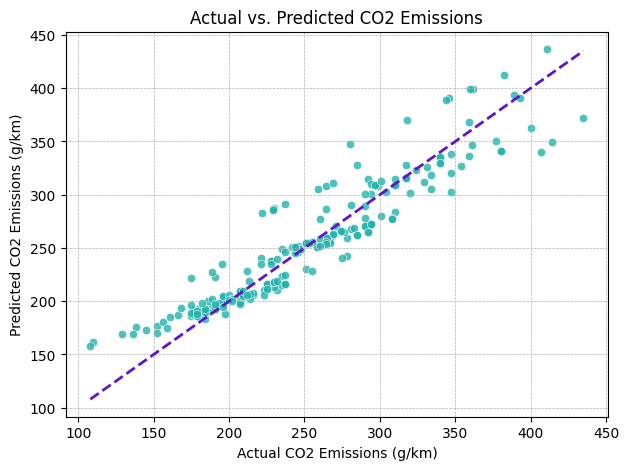

In [47]:
# Plotting the actual vs. predicted values
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_selected, alpha=0.8, color='lightseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='#5F14CB')  # Diagonal line
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The scatter plot illustrates the actual CO2 emissions (x-axis) against the predicted CO2 emissions (y-axis) for our linear regression model based on the selected features. Here are some observations from the plot:
* Diagonal Line: The dashed diagonal line represents where the predicted values would lie if they were perfectly accurate. Points close to this line indicate accurate predictions by the model.
* Distribution of Points: Most of the data points are clustered around the diagonal line, indicating that our model's predictions are generally accurate and closely match the actual values.
* Variability: While many predictions are close to the diagonal, there's some variability, especially for vehicles with higher CO2 emissions. This suggests areas where the model might benefit from further refinement or additional features.
